In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

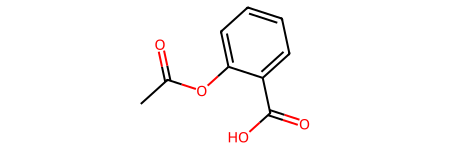

In [2]:
# 阿司匹林 的SMILES
smiles_string = 'CC(=O)OC1=CC=CC=C1C(=O)O'  
# 将SMILES转换为RDKit分子对象
molecule = Chem.MolFromSmiles(smiles_string)
molecule

In [3]:
# 计算描述符 物理化学性质
mol_weight = Descriptors.MolWt(molecule) # 分子量
polar_surface_area = Descriptors.TPSA(molecule) # 极表面积
print(f'分子量为：{mol_weight}')
print(f'极表面积：{polar_surface_area}')

分子量为：180.15899999999996
极表面积：63.60000000000001


In [4]:
# 计算描述符 3D结构
AllChem.EmbedMolecule(molecule)
# 计算分子的力场最小能量构象
AllChem.UFFOptimizeMolecule(molecule)
# 获取分子的三维坐标
conformer = molecule.GetConformer()
num_atoms = molecule.GetNumAtoms()
for i in range(num_atoms):
    atom_position = conformer.GetAtomPosition(i)
    atom_symbol = molecule.GetAtomWithIdx(i).GetSymbol()
    print(f"原子 {i+1}: {atom_symbol} - X: {atom_position.x:.2f}, Y: {atom_position.y:.2f}, Z: {atom_position.z:.2f}")

[14:11:20] Molecule does not have explicit Hs. Consider calling AddHs()


原子 1: C - X: 2.67, Y: -2.77, Z: 0.04
原子 2: C - X: 1.27, Y: -2.29, Z: 0.04
原子 3: O - X: 0.33, Y: -3.13, Z: 0.06
原子 4: O - X: 1.02, Y: -0.91, Z: 0.01
原子 5: C - X: -0.24, Y: -0.28, Z: 0.01
原子 6: C - X: -1.43, Y: -1.02, Z: 0.03
原子 7: C - X: -2.67, Y: -0.39, Z: 0.03
原子 8: C - X: -2.74, Y: 1.00, Z: 0.00
原子 9: C - X: -1.57, Y: 1.76, Z: -0.02
原子 10: C - X: -0.31, Y: 1.14, Z: -0.02
原子 11: C - X: 0.89, Y: 2.00, Z: -0.05
原子 12: O - X: 2.05, Y: 1.51, Z: -0.05
原子 13: O - X: 0.75, Y: 3.39, Z: -0.08


[14:11:20] Molecule does not have explicit Hs. Consider calling AddHs()


In [5]:
# 获取原子索引
atom_indices = [atom.GetIdx() for atom in molecule.GetAtoms()]

# 获取每个键的原子索引
for bond in molecule.GetBonds():
    atom1_index = bond.GetBeginAtomIdx()
    atom2_index = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType()

    # 获取原子
    atom1 = molecule.GetAtomWithIdx(atom1_index)
    atom2 = molecule.GetAtomWithIdx(atom2_index)

    # 寻找共用键的第三个原子
    for neighbor in atom1.GetNeighbors():
        if neighbor.GetIdx() != atom2_index:
            atom3_index = neighbor.GetIdx()
            break
    else:
        continue  # 如果没有第三个原子，则跳过当前键

    # 计算键角，使用原子的三维坐标
    angle = Chem.rdMolTransforms.GetAngleDeg(molecule.GetConformer(), atom1_index, atom2_index, atom3_index)
    print(f"原子索引：{atom1_index}-{atom2_index}-{atom3_index}，键类型：{bond_type}，角度：{angle:.2f}度")

原子索引：1-2-0，键类型：DOUBLE，角度：33.21度
原子索引：1-3-0，键类型：SINGLE，角度：31.49度
原子索引：3-4-1，键类型：SINGLE，角度：26.63度
原子索引：4-5-3，键类型：AROMATIC，角度：29.36度
原子索引：5-6-4，键类型：AROMATIC，角度：29.63度
原子索引：6-7-5，键类型：AROMATIC，角度：30.07度
原子索引：7-8-6，键类型：AROMATIC，角度：30.03度
原子索引：8-9-7，键类型：AROMATIC，角度：29.44度
原子索引：9-10-8，键类型：SINGLE，角度：30.04度
原子索引：10-11-9，键类型：DOUBLE，角度：31.99度
原子索引：10-12-9，键类型：SINGLE，角度：31.08度
原子索引：9-4-8，键类型：AROMATIC，角度：30.20度


扩展连接指纹（ECFP）  
原理：ECFP通过考虑分子中原子的化学环境（原子的类型、键的类型、连接的原子）来生成。它通过递增半径迭代地编码这些环境，生成唯一的指纹。  
位数：可变，常见的有1024位或2048位。  
反映的结构信息：能够表示分子中的原子环境，包括局部的分子结构和原子的连通性。  

In [6]:
# 生成ECFP(扩展连接指纹)分子指纹
ecfp_fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=2, nBits=2048)
# 将分子指纹转换为01字符串
fingerprint_bits = ecfp_fingerprint.ToBitString()
print(len(fingerprint_bits))
print(f'ECFP分子指纹二进制表示:{ fingerprint_bits}')

2048
ECFP分子指纹二进制表示:000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000

MACCS键指纹  
原理：MACCS键指纹基于166个预定义的结构键。每个键代表分子中可能出现的特定化学结构模式，如特定类型的原子、键或官能团。  
位数：通常有166位。  
反映的结构信息：可以捕捉到分子中是否存在特定的化学结构和官能团。  

In [8]:
# 计算分子的MACCS指纹
maccs_fp = MACCSkeys.GenMACCSKeys(molecule)
# 将MACCS指纹转换为二进制字符串
maccs_fp_bits = maccs_fp.ToBitString()
print(len(maccs_fp_bits))
print(f"MACCS分子指纹二进制表示:{maccs_fp_bits}")

167
MACCS分子指纹二进制表示:00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000100000000010011000000001001100110100010101001011011110


PubChem指纹  
原理：PubChem指纹由一系列预定义的规则组成，这些规则描述了分子结构中可能出现的各种特征。  
位数：PubChem指纹有881位。  
反映的结构信息：能够表示分子中存在的各种化学结构特征，如环系统、键类型、官能团等。  

In [9]:
from pubchempy import get_compounds

# 通过SMILES表示式搜索阿司匹林
aspirin_compounds = get_compounds('CC(=O)OC1=CC=CC=C1C(=O)O', 'smiles')

# 获取PubChem指纹
aspirin_pubchem_fp = aspirin_compounds[0].cactvs_fingerprint
print(len(aspirin_pubchem_fp))
print(f"Pubchem分子指纹二进制表示:{aspirin_pubchem_fp}")

881
Pubchem分子指纹二进制表示:11000000011100000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000001101000000000000000000000100000000000000000000000110000000100100000001001100000000000001100100000111010000000000000000000011000000000100010000000001000100000110100100000100000000000000000100000100000000000001001000010000000000000000010001000100000000001000001100000100011001000000011000010011100110110100001000011010100011010100000100111101101100000101001011110000000010001000010001011100110000111100010001100100000100000100011100000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000
